In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data collection


In [2]:
from google.colab import files
upload = files.upload()

Saving cricket.csv to cricket.csv


In [3]:
cric = pd.read_csv(r'cricket.csv')
cric

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,dat,mont,quarte,da
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328639,05-05-2018,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,05-05-2018,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,05-05-2018,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,05-05-2018,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,05-05-2018,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,11-04-2018,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,11-04-2018,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,11-04-2018,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,11-04-2018,11,4,4


Data preprocessing

In [4]:
cric.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,dat,mont,quarte,da
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328639,05-05-2018,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,05-05-2018,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,05-05-2018,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,05-05-2018,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,05-05-2018,5,2,5


In [5]:
cric.tail()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,dat,mont,quarte,da
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,11-04-2018,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,11-04-2018,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,11-04-2018,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,11-04-2018,11,4,4
142523,1569,486,250000,5,0,1,1.79,50000.0,5,279.329609,11-04-2018,11,4,4


In [9]:
cric['dat']

0         05-05-2018
1         05-05-2018
2         05-05-2018
3         05-05-2018
4         05-05-2018
             ...    
142519    11-04-2018
142520    11-04-2018
142521    11-04-2018
142522    11-04-2018
142523    11-04-2018
Name: dat, Length: 142524, dtype: object

In [7]:
cric.columns


Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'dat', 'mont', 'quarte', 'da'],
      dtype='object')

In [10]:
cric['film_code'].value_counts()

1554    11614
1493    10491
1481     9531
1484     8657
1482     7397
1556     7000
1483     6972
1485     6096
1494     6022
1498     5547
1499     5188
1576     4434
1497     3911
1559     3650
1572     3582
1558     3549
1511     3254
1495     2958
1553     2861
1573     2447
1552     2446
1486     2294
1551     2268
1562     2144
1578     1849
1575     1589
1496     1443
1480     1386
1563     1301
1492     1086
1564     1045
1569      987
1560      931
1550      678
1568      663
1500      633
1502      601
1512      565
1566      558
1571      552
1471      466
1557      418
1587      414
1570      341
1565      314
1567      285
1589       67
1584       39
Name: film_code, dtype: int64

In [11]:
cric['cinema_code'].value_counts()

524    2474
489    2407
448    2345
163    2241
518    2193
       ... 
520      12
565      10
637       5
566       2
424       1
Name: cinema_code, Length: 246, dtype: int64

In [12]:
cric.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,mont,quarte,da
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235180,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


Data cleaning

In [13]:
cric.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
dat               0
mont              0
quarte            0
da                0
dtype: int64

In [14]:
cric.dropna()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,dat,mont,quarte,da
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328639,05-05-2018,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,05-05-2018,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,05-05-2018,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,05-05-2018,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,05-05-2018,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,11-04-2018,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,11-04-2018,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,11-04-2018,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,11-04-2018,11,4,4


In [15]:
cric = cric.dropna(how = 'any')

In [16]:
cric.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
dat             0
mont            0
quarte          0
da              0
dtype: int64

In [17]:
cric.shape

(142399, 14)

outlier detetction

<Axes: xlabel='film_code'>

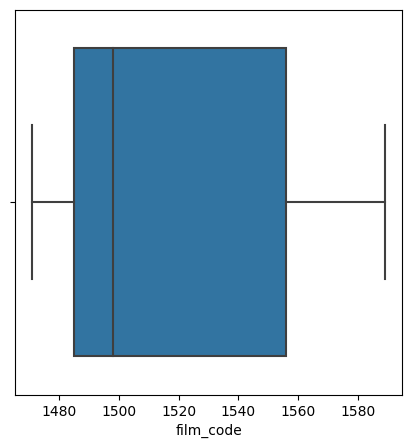

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(x='film_code',data = cric)


<Axes: xlabel='mont'>

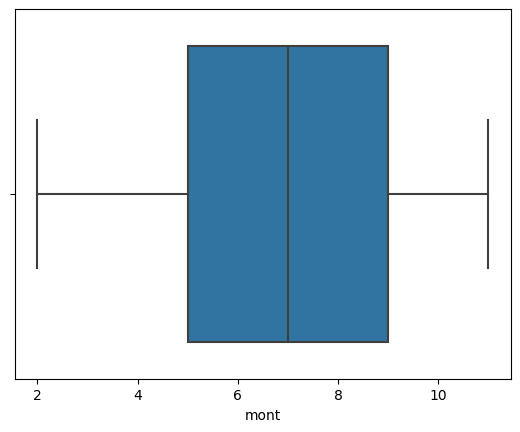

In [21]:

sns.boxplot(x='mont',data = cric)

<Axes: xlabel='cinema_code'>

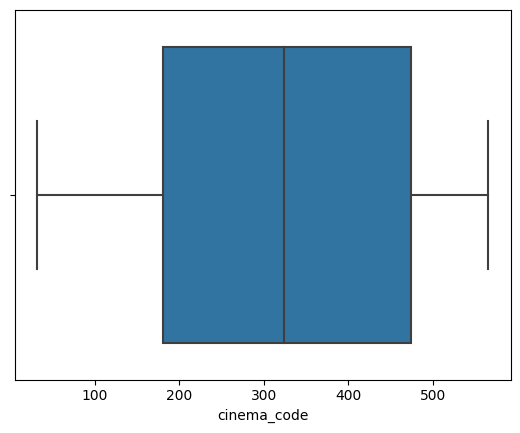

In [22]:
sns.boxplot(x='cinema_code',data = cric)


<Axes: xlabel='total_sales'>

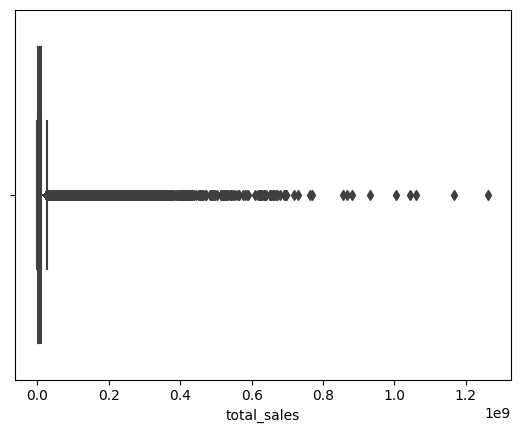

In [23]:
sns.boxplot(x='total_sales',data = cric)


<Axes: xlabel='da'>

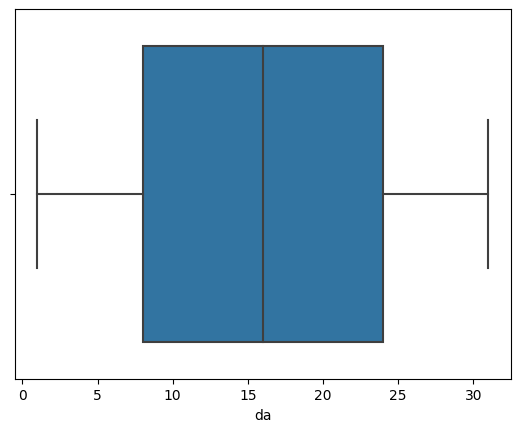

In [25]:

sns.boxplot(x='da',data = cric)

<Axes: xlabel='occu_perc'>

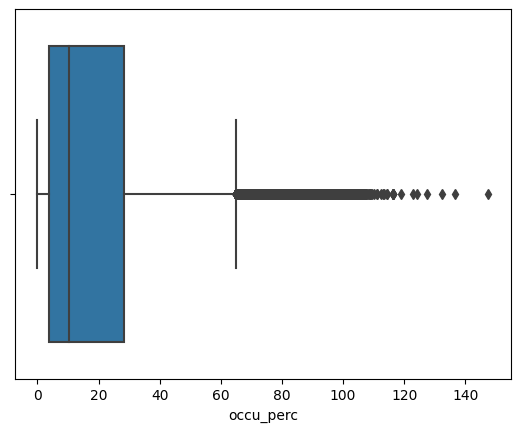

In [26]:

sns.boxplot(x='occu_perc',data = cric)


<Axes: xlabel='show_time'>

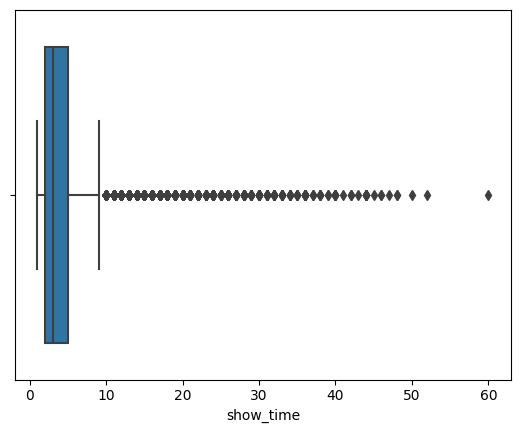

In [27]:
sns.boxplot(x='show_time',data = cric)

<Axes: xlabel='capacity'>

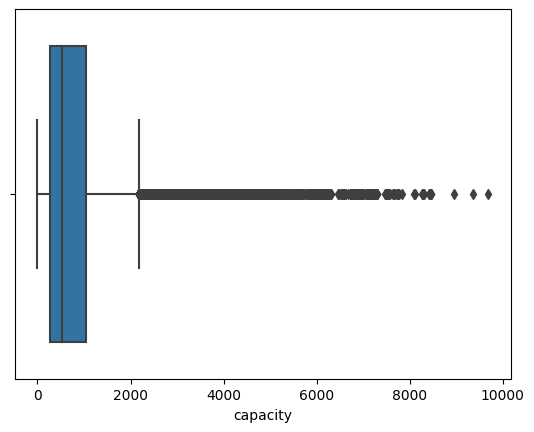

In [28]:
sns.boxplot(x='capacity',data = cric)

In [30]:
cric = cric.drop(columns = ['tickets_sold','tickets_out','ticket_use','dat','quarte'],axis = 1)

In [31]:
 from scipy import stats

# Calculate the Z-Scores for all columns in the DataFrame
z_scores = stats.zscore(cric)

# Define a threshold for Z-Scores (e.g., 3)
threshold = 3

# Create a mask of outliers
outlier_mask = (abs(z_scores) > threshold).any(axis=1)

# Remove the rows containing outliers
cric = cric[~outlier_mask]

# Now df_no_outliers contains your data with outliers removed

In [32]:
cric.shape

(133840, 9)

<Axes: xlabel='mont', ylabel='count'>

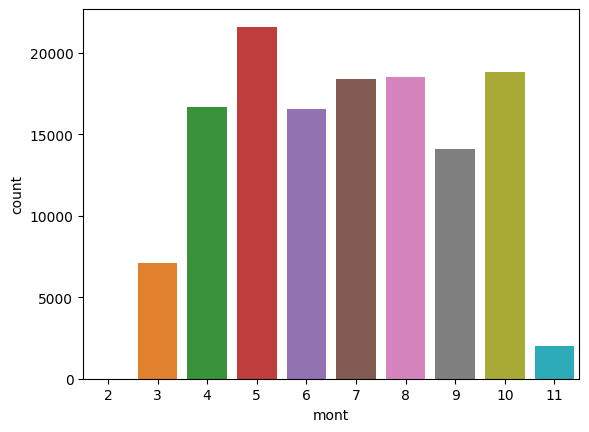

In [33]:
sns.countplot(x='mont',data = cric)

<Axes: xlabel='mont', ylabel='total_sales'>

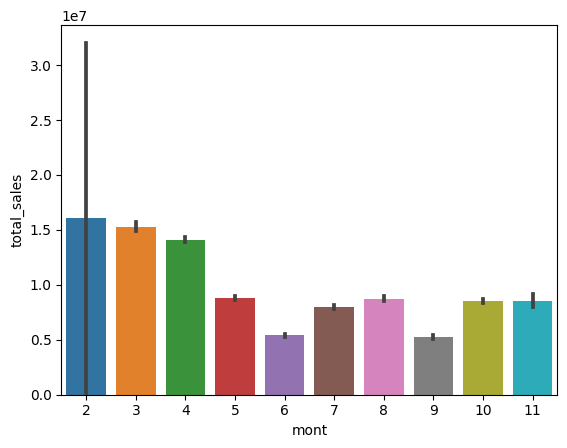

In [34]:
sns.barplot(x='mont',y='total_sales',data = cric)

<Axes: xlabel='da', ylabel='total_sales'>

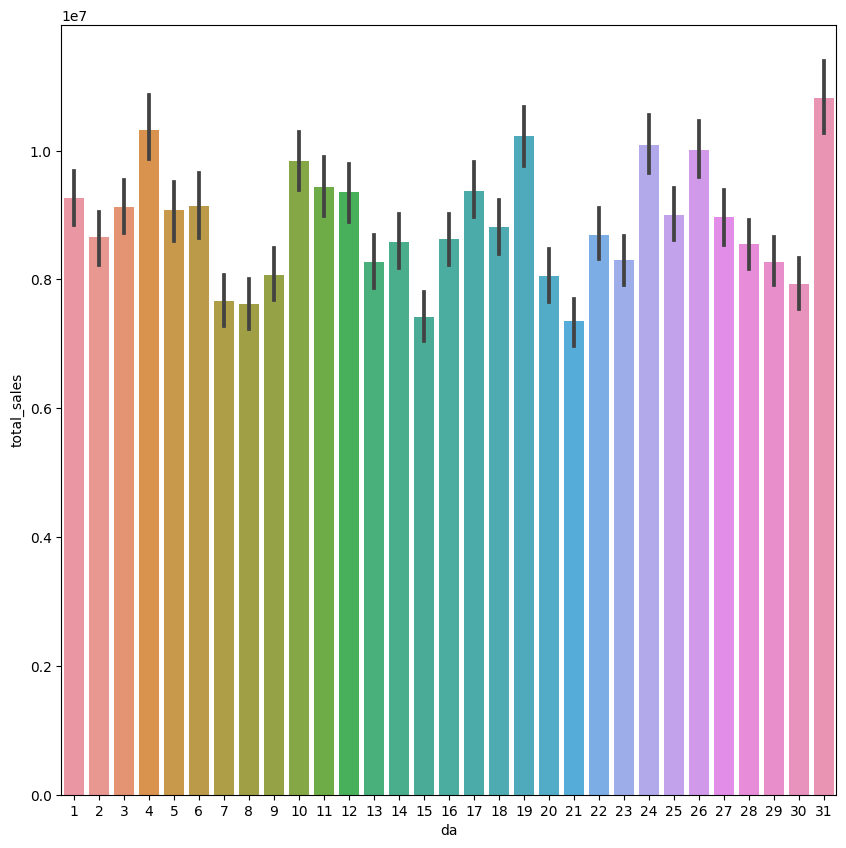

In [35]:
plt.figure(figsize = (10,10))
sns.barplot(x='da',y='total_sales',data = cric)

In [36]:
#plt.figure(figsize = (15,15))
#sns.barplot(x='film_code',y='total_sales',data = cric)

In [37]:
x = cric.drop(columns = ['ticket_price'],axis = 1)
y = cric['ticket_price']

In [38]:
x.columns

Index(['film_code', 'cinema_code', 'total_sales', 'show_time', 'occu_perc',
       'capacity', 'mont', 'da'],
      dtype='object')

In [39]:
x.head()

,film_code,cinema_code,total_sales,show_time,occu_perc,capacity,mont,da
0,1492,304,3900000,4,4.26,610.328639,5,5
1,1492,352,3360000,5,8.08,519.801980,5,5
2,1492,489,2560000,4,20.00,160.000000,5,5
3,1492,429,1200000,1,11.01,108.991826,5,5
4,1492,524,1200000,3,16.67,89.982004,5,5


In [40]:
y.head()

0    150000.0
1     80000.0
2     80000.0
3    100000.0
4     80000.0
Name: ticket_price, dtype: float64

In [41]:
x.shape

(133840, 8)

In [42]:
y.shape

(133840,)

model training and evaluation

In [43]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [44]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(107072, 8) (107072,) (26768, 8) (26768,)


In [45]:
from sklearn.preprocessing import StandardScaler as ss
xtrain = ss().fit_transform(xtrain)

In [46]:
xtest = ss().fit_transform(xtest)

In [47]:
xtrain.shape

(107072, 8)

In [48]:
ytrain.shape

(107072,)

In [49]:
xtrain

array([[ 1.2747997 ,  0.95512006, -0.57900075, ..., -1.04026121,
         1.00813068, -0.68440923],
       [-0.99385454, -0.9688285 ,  0.86302039, ..., -0.17589808,
        -1.28155322, -0.68440923],
       [-1.02152106, -0.63450301, -0.29073782, ...,  0.22246837,
        -1.73949   ,  0.54655457],
       ...,
       [-1.02152106,  1.25790541, -0.32394458, ..., -0.58229883,
        -1.28155322,  0.21083717],
       [ 1.02580106,  0.77218725, -0.20878072, ..., -0.30034351,
         0.5501939 ,  0.32274297],
       [-0.71718939, -0.0478564 , -0.60726182, ..., -0.85697599,
        -0.82361644, -0.34869183]])

In [50]:
ytrain

37534      80000.00000
69515      50000.00000
106242     80000.00000
94213      66666.66667
63043     100000.00000
              ...     
117523     60000.00000
127662     96072.50755
110720    128787.87880
140543    120000.00000
129883     60000.00000
Name: ticket_price, Length: 107072, dtype: float64

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [54]:
ytestpred = model.predict(xtest)


In [55]:
from sklearn.metrics import r2_score

In [56]:
r21 = r2_score(ytest,ytestpred)
print("r2score for training is:",r21)

r2score for training is: 0.17987054146377834


In [57]:
from sklearn.ensemble import RandomForestRegressor as rrs
model1 =  rrs()
model1.fit(xtrain,ytrain)

RandomForestRegressor()

In [58]:
ytestpred1 = model1.predict(xtest)
r22 = r2_score(ytest,ytestpred1)
print("r2score for testing is:",r22)

r2score for testing is: 0.8004759584689747


Building a predictive system


In [59]:
input = [1492,524,1200000,3,16.67,89.982004,5,5]
arr = np.asarray(input)
shap = arr.reshape(1,-1)
pre = model.predict(shap)
print("The ticket price is:",pre)

The ticket price is: [1.92243969e+10]


In [60]:
input = [1492,524,1200000,3,16.67,89.982004,5,5]
arr = np.asarray(input)
shap = arr.reshape(1,-1)
pre = model1.predict(shap)
print("The ticket price is:",pre)

The ticket price is: [56051.5888483]
